# Ploting Points

### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Start Ploting Points

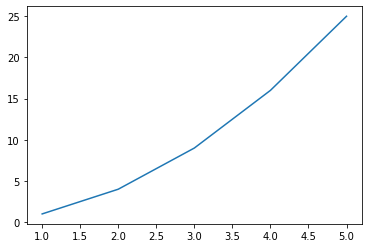

In [10]:
plt.plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25]) #plt.pot(x values, y values)
plt.show()

In [11]:
x = np.linspace(0, 1.5 * np.pi, 100) 
y = np.sin(x**2)+np.cos(x**2) 

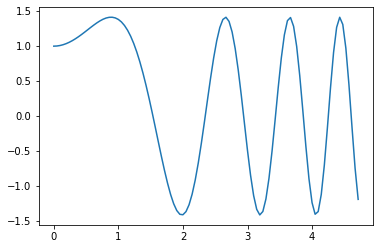

In [12]:
plt.plot(x, y)
plt.show()

### Multiple graphs in matrix style

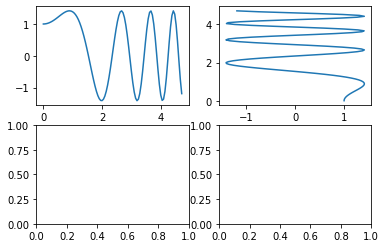

In [29]:
fig, axs = plt.subplots(2,2)
axs[0, 0].plot(x, y) 
axs[0, 1].plot(y, x)

### Input csv file

In [17]:
seattle_weather = pd.read_csv("data/seattle-weather.csv")

### Analyzing the csv file

In [18]:
seattle_weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012/01/01,0.0,12.8,5.0,4.7,drizzle
1,2012/01/02,10.9,10.6,2.8,4.5,rain
2,2012/01/03,0.8,11.7,7.2,2.3,rain
3,2012/01/04,20.3,12.2,5.6,4.7,rain
4,2012/01/05,1.3,8.9,2.8,6.1,rain


In [19]:
seattle_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
date             1461 non-null object
precipitation    1461 non-null float64
temp_max         1461 non-null float64
temp_min         1461 non-null float64
wind             1461 non-null float64
weather          1461 non-null object
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [20]:
seattle_weather.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [21]:
seattle_weather.index

RangeIndex(start=0, stop=1461, step=1)

### Plot points from cvs file data

In [54]:
x0=seattle_weather["temp_max"]
y0=seattle_weather["temp_min"]

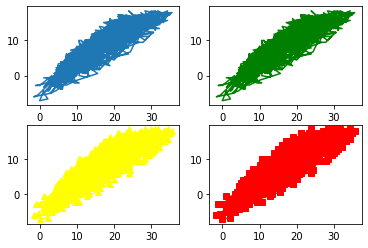

In [55]:
fig, axs = plt.subplots(2,2)
axs[0, 0].plot(x0, y0)
axs[0, 1].plot(x0, y0, color="green")
axs[1, 0].plot(x0, y0, marker='^', color="yellow")
axs[1, 1].plot(x0, y0, marker='s', color="red", linestyle=None)

color is used to define the color of the points and lines.

linestyle is used to select the style of the line from one point to another point

marker is used to select the style of the points

#### For more marker and line style visit 

https://matplotlib.org/api/markers_api.html

https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

### Time Serie Data Ploting

In [33]:
dt = pd.read_csv("data/seattle-weather.csv", parse_dates=["date"], index_col="date")
dt.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


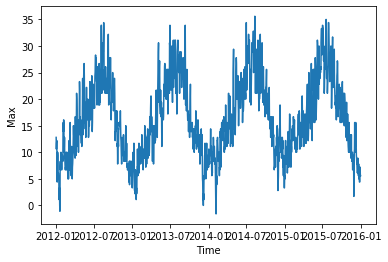

In [56]:
fig, ax =plt.subplots()
ax.plot(dt.index, dt["temp_max"])
ax.set_xlabel("Time")
ax.set_ylabel("Max")
plt.show()

### Multiple column values in same graph

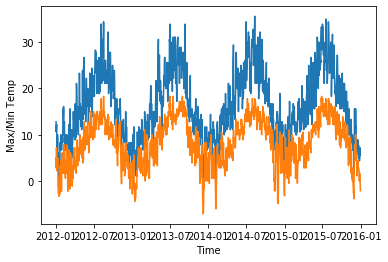

In [36]:
from pandas.plotting import register_matplotlib_converters
fig, ax =plt.subplots()
ax.plot(dt.index, dt["temp_max"])
ax.plot(dt.index, dt["temp_min"])
ax.set_xlabel("Time")
ax.set_ylabel("Max/Min Temp")
plt.show()

Here, x and y labels are same for both functions

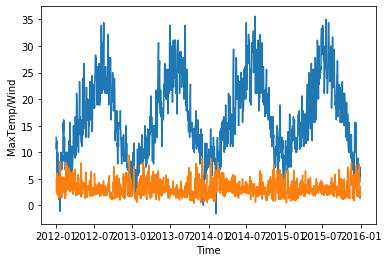

In [57]:
fig, ax =plt.subplots()
ax.plot(dt.index, dt["temp_max"])
ax.plot(dt.index, dt["wind"])
ax.set_xlabel("Time")
ax.set_ylabel("MaxTemp/Wind")
plt.show()

But here, the y label for Max Temp and Wind is not same

### Two different y labels in same graph

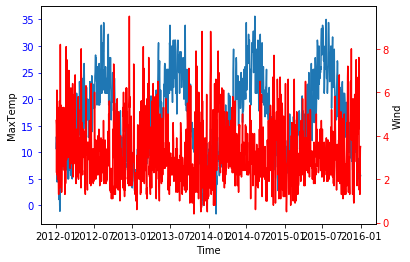

In [59]:
fig, ax =plt.subplots()
ax.plot(dt.index, dt["temp_max"])
ax.set_xlabel("Time")
ax.set_ylabel("MaxTemp")
ax.tick_params('y', colors='b')
ax2=ax.twinx()
ax2.plot(dt.index, dt["wind"], color='r')
ax2.set_ylabel("Wind")
ax2.tick_params('y', colors='r')
plt.show()

Here, both functions are using different y labels but their x label is same.

### Creating Function for ploting

In [40]:
def ploting(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

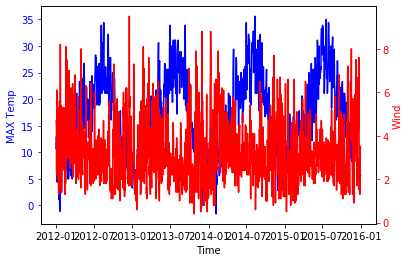

In [44]:
fig, ax=plt.subplots()
ploting(ax, dt.index, dt["temp_max"], 'blue', "Time", "MAX Temp")
ax2=ax.twinx()
ploting(ax2, dt.index, dt["wind"], 'red', "Time", "Wind")
plt.show()

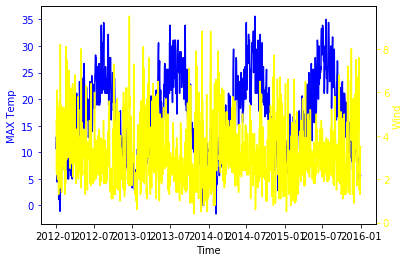

In [48]:
fig, ax=plt.subplots()
ploting(ax, dt.index, dt["temp_max"], 'blue', "Time", "MAX Temp")
ax2=ax.twinx()
ploting(ax2, dt.index, dt["wind"], 'yellow', "Time", "Wind")
plt.show()

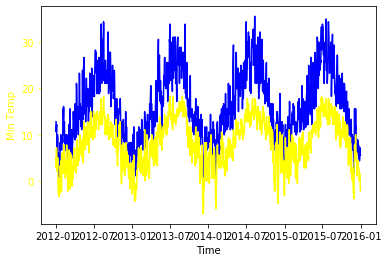

In [50]:
fig, ax=plt.subplots()
ploting(ax, dt.index, dt["temp_max"], 'blue', "Time", "MAX Temp")
ploting(ax, dt.index, dt["temp_min"], 'yellow', "Time", "Min Temp")
plt.show()

### Annotation on the graph

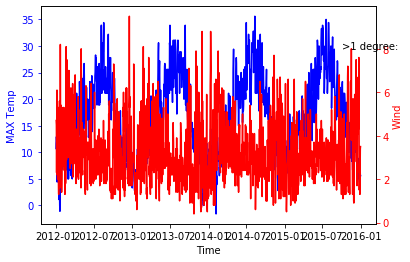

In [53]:
fig, ax=plt.subplots()
ploting(ax, dt.index, dt["temp_max"], 'blue', "Time", "MAX Temp")
ax2=ax.twinx()
ploting(ax2, dt.index, dt["wind"], 'red', "Time", "Wind")
ax2.annotate(">1 degree:", xy=(pd.Timestamp("2015-10-06"),1), xytext=(pd.Timestamp("2015-10-01"), 8))
plt.show()

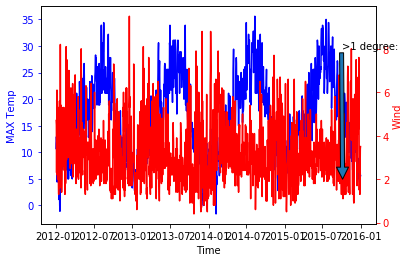

In [51]:
fig, ax=plt.subplots()
ploting(ax, dt.index, dt["temp_max"], 'blue', "Time", "MAX Temp")
ax2=ax.twinx()
ploting(ax2, dt.index, dt["wind"], 'red', "Time", "Wind")
ax2.annotate(">1 degree:", xy=(pd.Timestamp("2015-10-06"),2), xytext=(pd.Timestamp("2015-10-01"), 8), arrowprops={})
plt.show()

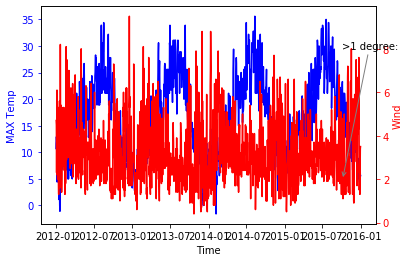

In [52]:
fig, ax=plt.subplots()
ploting(ax, dt.index, dt["temp_max"], 'blue', "Time", "MAX Temp")
ax2=ax.twinx()
ploting(ax2, dt.index, dt["wind"], 'red', "Time", "Wind")
ax2.annotate(">1 degree:", xy=(pd.Timestamp("2015-10-06"),2),xytext=(pd.Timestamp("2015-10-01") , 8), arrowprops={"arrowstyle":"->", "color":"gray"})
plt.show()

### For more annotation styles, visit
https://matplotlib.org/users/annotations.html